In [110]:
import glob
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
%matplotlib inline

In [10]:
cdc_zika = pd.read_csv("cdc_zika.csv", usecols=['location','data_field','value'])

/Users/amandazhang/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
cdc_zika

,location,data_field,value
0,Argentina-Buenos_Aires,cumulative_confirmed_local_cases,0
1,Argentina-Buenos_Aires,cumulative_probable_local_cases,0
2,Argentina-Buenos_Aires,cumulative_confirmed_imported_cases,2
3,Argentina-Buenos_Aires,cumulative_probable_imported_cases,1
4,Argentina-Buenos_Aires,cumulative_cases_under_study,127
5,Argentina-Buenos_Aires,cumulative_cases_discarded,0
6,Argentina-CABA,cumulative_confirmed_local_cases,0
7,Argentina-CABA,cumulative_probable_local_cases,0
8,Argentina-CABA,cumulative_confirmed_imported_cases,9
9,Argentina-CABA,cumulative_probable_imported_cases,0


In [125]:
# make USA dataframe
path = 'zika-master/United_States/CDC_Report/data'
cdcUSA_files = glob.glob(path + "/*.csv")

cdcUSA = pd.DataFrame()
cdcUSA_list = []

for file_ in cdcUSA_files:
    df = pd.read_csv(file_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
#    df['date'] = [str(file_)[-14:-4]]*len(df)
    cdcUSA_list.append(df)
    
cdcUSA = pd.concat(cdcUSA_list)
cdcUSA.report_date = pd.to_datetime(cdcUSA['report_date'])
cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)

In [126]:
cdcUSA_travel = cdcUSA[cdcUSA.data_field == 'zika_reported_travel']
cdcUSA_local = cdcUSA[cdcUSA.data_field == 'zika_reported_local']

In [127]:
cdcUSA_travel_Florida = cdcUSA_travel[cdcUSA_travel.location == 'United_States-Florida']
cdcUSA_local_Florida = cdcUSA_local[cdcUSA_local.location == 'United_States-Florida']
cdcUSA_travel_Texas = cdcUSA_travel[cdcUSA_travel.location == 'United_States-Texas']
cdcUSA_local_Texas = cdcUSA_local[cdcUSA_local.location == 'United_States-Texas']

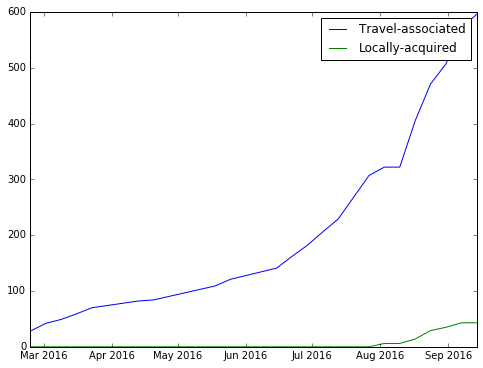

In [128]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(cdcUSA_travel_Florida.report_date, cdcUSA_travel_Florida.value, label='Travel-associated')
ax.plot(cdcUSA_local_Florida.report_date, cdcUSA_local_Florida.value, label='Locally-acquired')
plt.legend()

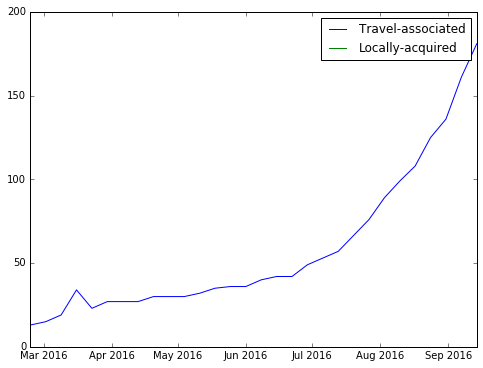

In [129]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(cdcUSA_travel_Texas.report_date, cdcUSA_travel_Texas.value, label='Travel-associated')
ax.plot(cdcUSA_local_Texas.report_date, cdcUSA_local_Texas.value, label='Locally-acquired')
plt.legend()

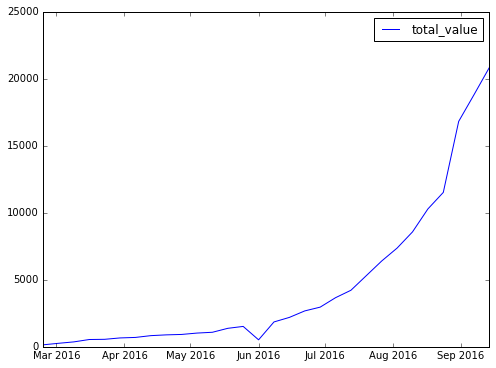

In [146]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(cdcUSA.report_date, cdcUSA.total_value)
#ax.plot(cdcUSA_local_Texas.report_date, cdcUSA_local_Texas.value, label='Locally-acquired')
plt.legend()

In [135]:
# make Brazil dataframe
path = 'zika-master/Brazil/Epidemiological_Bulletin/data'
allFiles = glob.glob(path + "/*.csv")

cdcBrazil = pd.DataFrame()
dfList = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    dfList.append(df)
    
cdcBrazil = pd.concat(dfList)
cdcBrazil.report_date = pd.to_datetime(cdcBrazil['report_date'])

In [141]:
cdcBrazil['total_value'] = cdcBrazil.groupby('report_date')['value'].transform(sum)

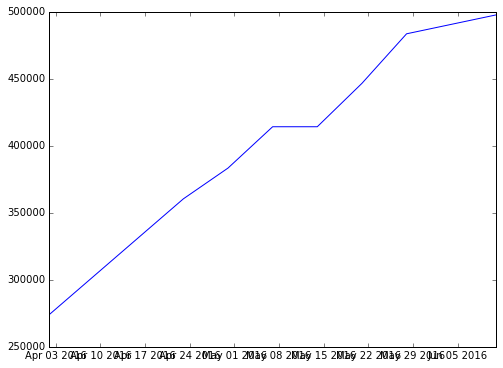

In [144]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(cdcBrazil.report_date, cdcBrazil.total_value)